In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [2]:
#reading the csv file
df = pd.read_csv("IPL 2022 Batters.csv")

#adjusting max rows to display all rows
pd.options.display.max_rows = 200

#dealing with null values
df = df.dropna()

#exploring correlations in the data
corr = df.corr()
print(corr)

data = {
  "Runs" : df.iloc[:,4],
  "HS" : df.iloc[:,5],
  "SR" : df.iloc[:,8]
}

df1 = pd.DataFrame(data)

#taking number of runs as dependent variable and number of 4s as independent variable
X = np.array(df.iloc[:,4]).reshape(-1,1)
Y = np.array(df.iloc[:,11]).reshape(-1,1)

#splitting dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y)

#using sklearn to train our model
regr = LinearRegression()
regr.fit(x_train, y_train)

#using model to predict number of 4s for test data
y_pred = regr.predict(x_test)

           Mat      Inns        NO      Runs        BF        SR       100  \
Mat   1.000000  0.812187  0.540736  0.621380  0.624197  0.178601  0.160287   
Inns  0.812187  1.000000  0.407033  0.880307  0.884458  0.336176  0.221278   
NO    0.540736  0.407033  1.000000  0.224061  0.186919  0.168349  0.030824   
Runs  0.621380  0.880307  0.224061  1.000000  0.986888  0.350650  0.461250   
BF    0.624197  0.884458  0.186919  0.986888  1.000000  0.283462  0.434576   
SR    0.178601  0.336176  0.168349  0.350650  0.283462  1.000000  0.077074   
100   0.160287  0.221278  0.030824  0.461250  0.434576  0.077074  1.000000   
50    0.454827  0.682295  0.097495  0.865277  0.857797  0.259396  0.340836   
4s    0.572930  0.831160  0.121716  0.963215  0.960353  0.309171  0.438869   

            50        4s  
Mat   0.454827  0.572930  
Inns  0.682295  0.831160  
NO    0.097495  0.121716  
Runs  0.865277  0.963215  
BF    0.857797  0.960353  
SR    0.259396  0.309171  
100   0.340836  0.438869  
50 

C:\Users\chinm\AppData\Local\Temp\ipykernel_8448\3717961978.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


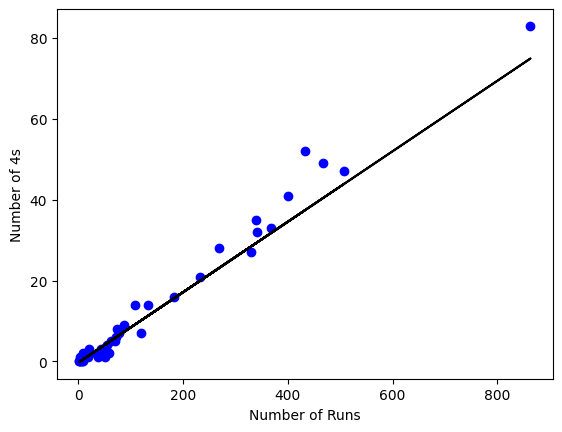

In [3]:
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')
plt.xlabel("Number of Runs")
plt.ylabel("Number of 4s")
plt.show()

In [4]:
MSE_test = mean_squared_error(y_test,y_pred)
print("Mean squared error for test data :"+str(MSE_test))

Mean squared error for test data :13.371826537024049


In [5]:
y_pred = regr.predict(x_train)

MSE_train = mean_squared_error(y_train,y_pred)
print("Mean squared error for train data :"+str(MSE_train))

Mean squared error for train data :18.813144584211123


In [6]:
y_pred = regr.predict(x_test)
data = {
    "4s": y_test.reshape(-1),
    "Predicted 4s" : y_pred.reshape(-1)
}

#a dataframe for comparing test data with prediction data
df1 = pd.DataFrame(data)
print(df1)

    4s  Predicted 4s
0    2      1.614553
1    3      3.445051
2    1      1.353054
3   21     19.919530
4    2      1.701720
5    1      0.045555
6    9      7.367546
7    0     -0.041611
8    1      0.655721
9   41     34.650678
10   7      6.408714
11   0     -0.128778
12   8      6.060048
13   3      1.527387
14  27     28.461852
15   2      0.394221
16   6      5.885714
17   0      0.307055
18  14      9.110877
19   7     10.156876
20  52     37.352841
21  14     11.290041
22   1      3.009218
23   0     -0.041611
24   2      3.183551
25  32     29.420684
26  83     74.921626
27  33     31.774181
28  35     29.333518
29  16     15.648369
30   0      0.307055
31   0     -0.128778
32  49     40.490837
33  47     43.977499
34   2      4.752549
35   5      5.711381
36   5      5.188382
37   0      0.481388
38   1      4.142383
39  28     23.057526
40   4      4.491050
